In [0]:
from google.colab import drive
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm, tree
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
train_df = pd.read_csv('/content/gdrive/My Drive/Hackathons/Data Storm 1.0/data-storm-10/credit_card_default_train.csv')
test_df = pd.read_csv('/content/gdrive/My Drive/Hackathons/Data Storm 1.0/data-storm-10/credit_card_default_test.csv')

In [0]:
# replacing balance limit v1
train_df['Balance_Limit_V1'] = train_df['Balance_Limit_V1'].replace('2.5M', 1)
train_df['Balance_Limit_V1'] = train_df['Balance_Limit_V1'].replace('1.5M', 0.6)
train_df['Balance_Limit_V1'] = train_df['Balance_Limit_V1'].replace('1M', 0.4)
train_df['Balance_Limit_V1'] = train_df['Balance_Limit_V1'].replace(' 500K', 0.2)
train_df['Balance_Limit_V1'] = train_df['Balance_Limit_V1'].replace('400K', 0.16)
train_df['Balance_Limit_V1'] = train_df['Balance_Limit_V1'].replace('300K', 0.12)
train_df['Balance_Limit_V1'] = train_df['Balance_Limit_V1'].replace('200K', 0.08)
train_df['Balance_Limit_V1'] = train_df['Balance_Limit_V1'].replace('100K', 0.04)
test_df['Balance_Limit_V1'] = test_df['Balance_Limit_V1'].replace('2.5M', 1)
test_df['Balance_Limit_V1'] = test_df['Balance_Limit_V1'].replace('1.5M', 0.6)
test_df['Balance_Limit_V1'] = test_df['Balance_Limit_V1'].replace('1M', 0.4)
test_df['Balance_Limit_V1'] = test_df['Balance_Limit_V1'].replace(' 500K', 0.2)
test_df['Balance_Limit_V1'] = test_df['Balance_Limit_V1'].replace('400K', 0.16)
test_df['Balance_Limit_V1'] = test_df['Balance_Limit_V1'].replace('300K', 0.12)
test_df['Balance_Limit_V1'] = test_df['Balance_Limit_V1'].replace('200K', 0.08)
test_df['Balance_Limit_V1'] = test_df['Balance_Limit_V1'].replace('100K', 0.04)

# replacing gender
train_df['Gender'] = train_df['Gender'].replace('M', 1)
train_df['Gender'] = train_df['Gender'].replace('F', -1)
test_df['Gender'] = test_df['Gender'].replace('M', 1)
test_df['Gender'] = test_df['Gender'].replace('F', -1)

# replacing educational status
train_df['EDUCATION_STATUS'] = train_df['EDUCATION_STATUS'].replace('Graduate', 1)
train_df['EDUCATION_STATUS'] = train_df['EDUCATION_STATUS'].replace('High School', 2)
train_df['EDUCATION_STATUS'] = train_df['EDUCATION_STATUS'].replace('Other', 3)
test_df['EDUCATION_STATUS'] = test_df['EDUCATION_STATUS'].replace('Graduate', 1)
test_df['EDUCATION_STATUS'] = test_df['EDUCATION_STATUS'].replace('High School', 2)
test_df['EDUCATION_STATUS'] = test_df['EDUCATION_STATUS'].replace('Other', 3)

# replacing marital status
train_df['MARITAL_STATUS'] = train_df['MARITAL_STATUS'].replace('Single', 0)
train_df['MARITAL_STATUS'] = train_df['MARITAL_STATUS'].replace('Other', 1)
test_df['MARITAL_STATUS'] = test_df['MARITAL_STATUS'].replace('Single', 0)
test_df['MARITAL_STATUS'] = test_df['MARITAL_STATUS'].replace('Other', 1)

# replacing age
train_df['AGE'] = train_df['AGE'].replace('Less than 30', 0.25)
train_df['AGE'] = train_df['AGE'].replace('31-45', 0.5)
train_df['AGE'] = train_df['AGE'].replace('46-65', 0.75)
train_df['AGE'] = train_df['AGE'].replace('More than 65', 1)
test_df['AGE'] = test_df['AGE'].replace('Less than 30', 0.25)
test_df['AGE'] = test_df['AGE'].replace('31-45', 0.5)
test_df['AGE'] = test_df['AGE'].replace('46-65', 0.75)
test_df['AGE'] = test_df['AGE'].replace('More than 65', 1)

# replacing due amount
train_df['DUE_AMT_JULY'] = train_df['DUE_AMT_JULY']
train_df['DUE_AMT_AUG'] = train_df['DUE_AMT_AUG']
train_df['DUE_AMT_SEP'] = train_df['DUE_AMT_SEP']
train_df['DUE_AMT_OCT'] = train_df['DUE_AMT_OCT']
train_df['DUE_AMT_NOV'] = train_df['DUE_AMT_NOV']
train_df['DUE_AMT_DEC'] = train_df['DUE_AMT_DEC']
test_df['DUE_AMT_JULY'] = test_df['DUE_AMT_JULY']
test_df['DUE_AMT_AUG'] = test_df['DUE_AMT_AUG']
test_df['DUE_AMT_SEP'] = test_df['DUE_AMT_SEP']
test_df['DUE_AMT_OCT'] = test_df['DUE_AMT_OCT']
test_df['DUE_AMT_NOV'] = test_df['DUE_AMT_NOV']
test_df['DUE_AMT_DEC'] = test_df['DUE_AMT_DEC']

# replacing paid amount
train_df['PAID_AMT_JULY'] = train_df['PAID_AMT_JULY']
train_df['PAID_AMT_AUG'] = train_df['PAID_AMT_AUG']
train_df['PAID_AMT_SEP'] = train_df['PAID_AMT_SEP']
train_df['PAID_AMT_OCT'] = train_df['PAID_AMT_OCT']
train_df['PAID_AMT_NOV'] = train_df['PAID_AMT_NOV']
train_df['PAID_AMT_DEC'] = train_df['PAID_AMT_DEC']
test_df['PAID_AMT_JULY'] = test_df['PAID_AMT_JULY']
test_df['PAID_AMT_AUG'] = test_df['PAID_AMT_AUG']
test_df['PAID_AMT_SEP'] = test_df['PAID_AMT_SEP']
test_df['PAID_AMT_OCT'] = test_df['PAID_AMT_OCT']
test_df['PAID_AMT_NOV'] = test_df['PAID_AMT_NOV']
test_df['PAID_AMT_DEC'] = test_df['PAID_AMT_DEC']


In [0]:
train_df['carrying_balance1'] = train_df['DUE_AMT_JULY'] - train_df['PAID_AMT_JULY']
train_df['carrying_balance2'] = train_df['DUE_AMT_AUG'] - train_df['PAID_AMT_AUG']
train_df['carrying_balance3'] = train_df['DUE_AMT_SEP'] - train_df['PAID_AMT_SEP']
train_df['carrying_balance4'] = train_df['DUE_AMT_OCT'] - train_df['PAID_AMT_OCT']
train_df['carrying_balance5'] = train_df['DUE_AMT_NOV'] - train_df['PAID_AMT_NOV']
train_df['carrying_balance6'] = train_df['DUE_AMT_DEC'] - train_df['PAID_AMT_DEC']
test_df['carrying_balance1'] = test_df['DUE_AMT_JULY'] - test_df['PAID_AMT_JULY']
test_df['carrying_balance2'] = test_df['DUE_AMT_AUG'] - test_df['PAID_AMT_AUG']
test_df['carrying_balance3'] = test_df['DUE_AMT_SEP'] - test_df['PAID_AMT_SEP']
test_df['carrying_balance4'] = test_df['DUE_AMT_OCT'] - test_df['PAID_AMT_OCT']
test_df['carrying_balance5'] = test_df['DUE_AMT_NOV'] - test_df['PAID_AMT_NOV']
test_df['carrying_balance6'] = test_df['DUE_AMT_DEC'] - test_df['PAID_AMT_DEC']

In [0]:
train_df['debt_credit_ratio1'] = train_df['carrying_balance1']/ train_df['Balance_Limit_V1']
train_df['debt_credit_ratio2'] = train_df['carrying_balance2']/ train_df['Balance_Limit_V1']
train_df['debt_credit_ratio3'] = train_df['carrying_balance3']/ train_df['Balance_Limit_V1']
train_df['debt_credit_ratio4'] = train_df['carrying_balance4']/ train_df['Balance_Limit_V1']
train_df['debt_credit_ratio5'] = train_df['carrying_balance5']/ train_df['Balance_Limit_V1']
train_df['debt_credit_ratio6'] = train_df['carrying_balance6']/ train_df['Balance_Limit_V1']
test_df['debt_credit_ratio1'] = test_df['carrying_balance1']/ test_df['Balance_Limit_V1']
test_df['debt_credit_ratio2'] = test_df['carrying_balance2']/ test_df['Balance_Limit_V1']
test_df['debt_credit_ratio3'] = test_df['carrying_balance3']/ test_df['Balance_Limit_V1']
test_df['debt_credit_ratio4'] = test_df['carrying_balance4']/ test_df['Balance_Limit_V1']
test_df['debt_credit_ratio5'] = test_df['carrying_balance5']/ test_df['Balance_Limit_V1']
test_df['debt_credit_ratio6'] = test_df['carrying_balance6']/ test_df['Balance_Limit_V1']

In [0]:
train_df=train_df.drop(['DUE_AMT_JULY','DUE_AMT_AUG','DUE_AMT_SEP','DUE_AMT_OCT','DUE_AMT_NOV',
              'DUE_AMT_DEC','PAID_AMT_JULY','PAID_AMT_AUG','PAID_AMT_SEP','PAID_AMT_OCT', 'PAID_AMT_NOV','PAID_AMT_DEC'], axis=1)

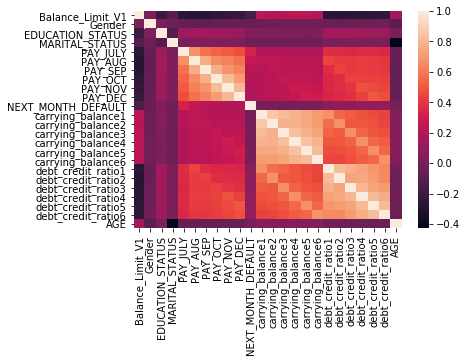

In [8]:
corr = train_df[['Balance_Limit_V1', 'Gender', 'EDUCATION_STATUS', 'MARITAL_STATUS', 'PAY_JULY', 'PAY_AUG',
       'PAY_SEP', 'PAY_OCT', 'PAY_NOV', 'PAY_DEC', 'NEXT_MONTH_DEFAULT',
       'carrying_balance1', 'carrying_balance2', 'carrying_balance3',
       'carrying_balance4', 'carrying_balance5', 'carrying_balance6',
       'debt_credit_ratio1', 'debt_credit_ratio2', 'debt_credit_ratio3',
       'debt_credit_ratio4', 'debt_credit_ratio5', 'debt_credit_ratio6',
       'AGE']].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)
plt.show()

In [0]:
features = ['Balance_Limit_V1', 'Gender', 'EDUCATION_STATUS', 'MARITAL_STATUS', 'PAY_JULY', 'PAY_AUG',
       'PAY_SEP', 'PAY_OCT', 'PAY_NOV', 'PAY_DEC',
       'carrying_balance1', 'carrying_balance2', 'carrying_balance3',
       'carrying_balance4', 'carrying_balance5', 'carrying_balance6',
       'debt_credit_ratio1', 'debt_credit_ratio2', 'debt_credit_ratio3',
       'debt_credit_ratio4', 'debt_credit_ratio5', 'debt_credit_ratio6',
       'AGE']

output= 'NEXT_MONTH_DEFAULT'

X = train_df[features].values    
y = train_df[ output ].values
submit_test = test_df[features].values 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

In [10]:

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
y_pred_submit = model.predict( submit_test )
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 82.00%


In [0]:
# saving results file
fo = open('/content/gdrive/My Drive/Hackathons/Data Storm 1.0/Lahiru_Solution/result_final1.csv', 'w')
for x in np.nditer(y_pred_submit):
    fo.write(str(x))
    fo.write('\n')
fo.close()